In [2]:
import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [18]:


df = pd.read_csv('D://T1.csv',parse_dates=True,index_col='Date/Time')
df=df.drop(['Theoretical_Power_Curve (KWh)'], axis = 1)

In [19]:
df=df.reindex(pd.date_range(start=df.index[0], end=df.index[-1], freq='10T'))
df = df.ffill().bfill()

In [20]:
df.head()

,Wind Speed (m/s),LV ActivePower (kW),Wind Direction (°)
2018-01-01 00:00:00,5.311336,380.047790,259.994904
2018-01-01 00:10:00,5.672167,453.769196,268.641113
2018-01-01 00:20:00,5.216037,306.376587,272.564789
2018-01-01 00:30:00,5.659674,419.645904,271.258087
2018-01-01 00:40:00,5.577941,380.650696,265.674286


In [21]:
min(df)

'LV ActivePower (kW)'

In [22]:
len(df)

52560

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=15,5

In [40]:
df.loc[df['Wind Speed (m/s)'] < 1,'Wind Speed (m/s)']=1

In [41]:
min(df['Wind Speed (m/s)'])

1.0

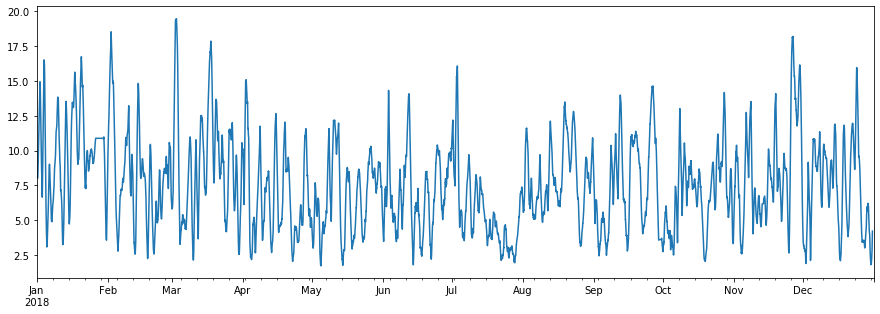

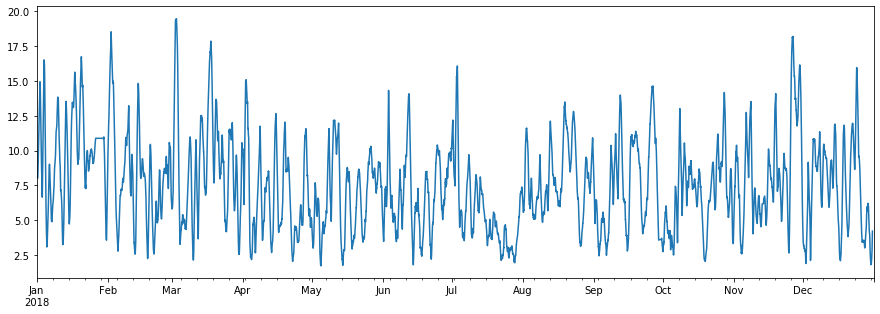

In [45]:
result = seasonal_decompose(df['Wind Speed (m/s)'], model='multiplicative',freq=144)
result.trend.plot()
pyplot.show()
result_dir = seasonal_decompose(df['Wind Speed (m/s)'], model='additive',freq=144)
result_dir.trend.plot()
pyplot.show()

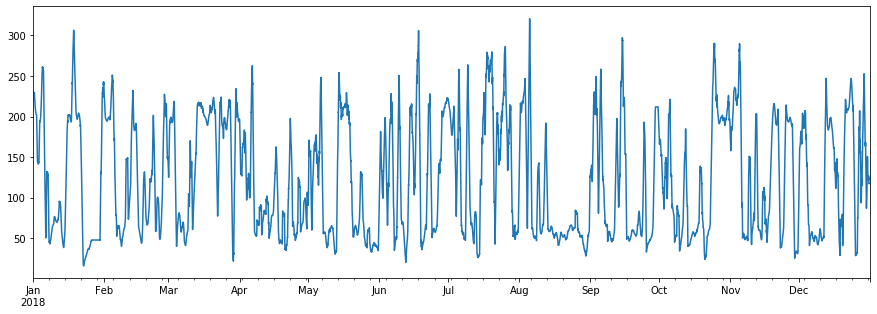

In [43]:
result_dir = seasonal_decompose(df['Wind Direction (°)'], model='additive',freq=144)
result_dir.trend.plot()
pyplot.show()

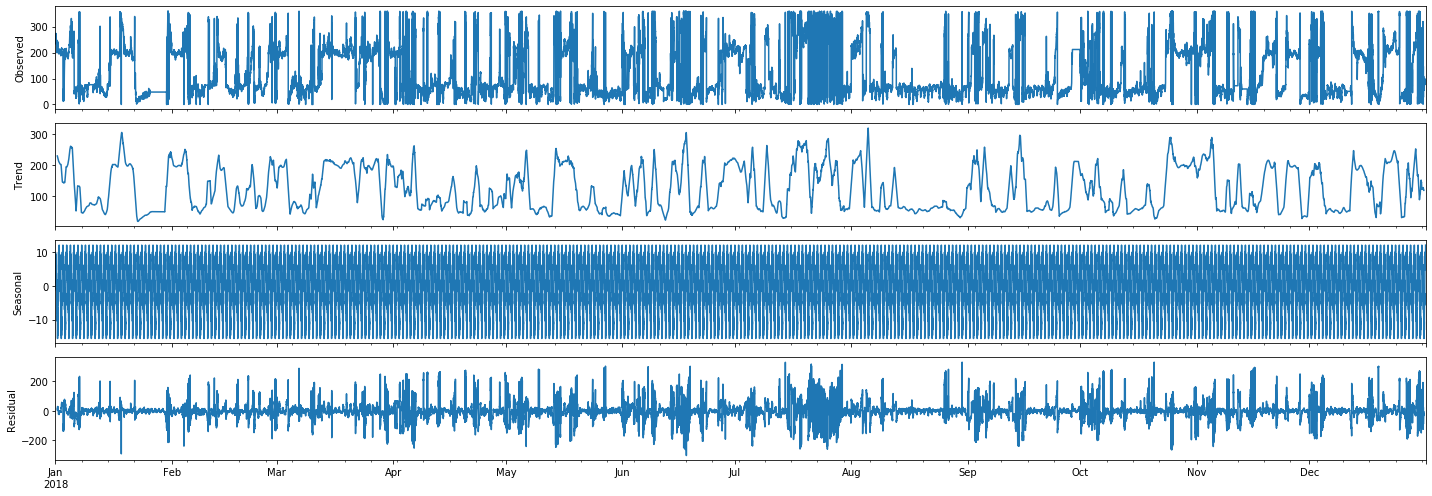

In [13]:
result_f = seasonal_decompose(df['Wind Direction (°)'], model='additive',freq=144)
result_f.plot()
pyplot.show()